**DRIVER DROWSINESS DETECTION SYSTEM**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

**DETECTION USING VGG-16**

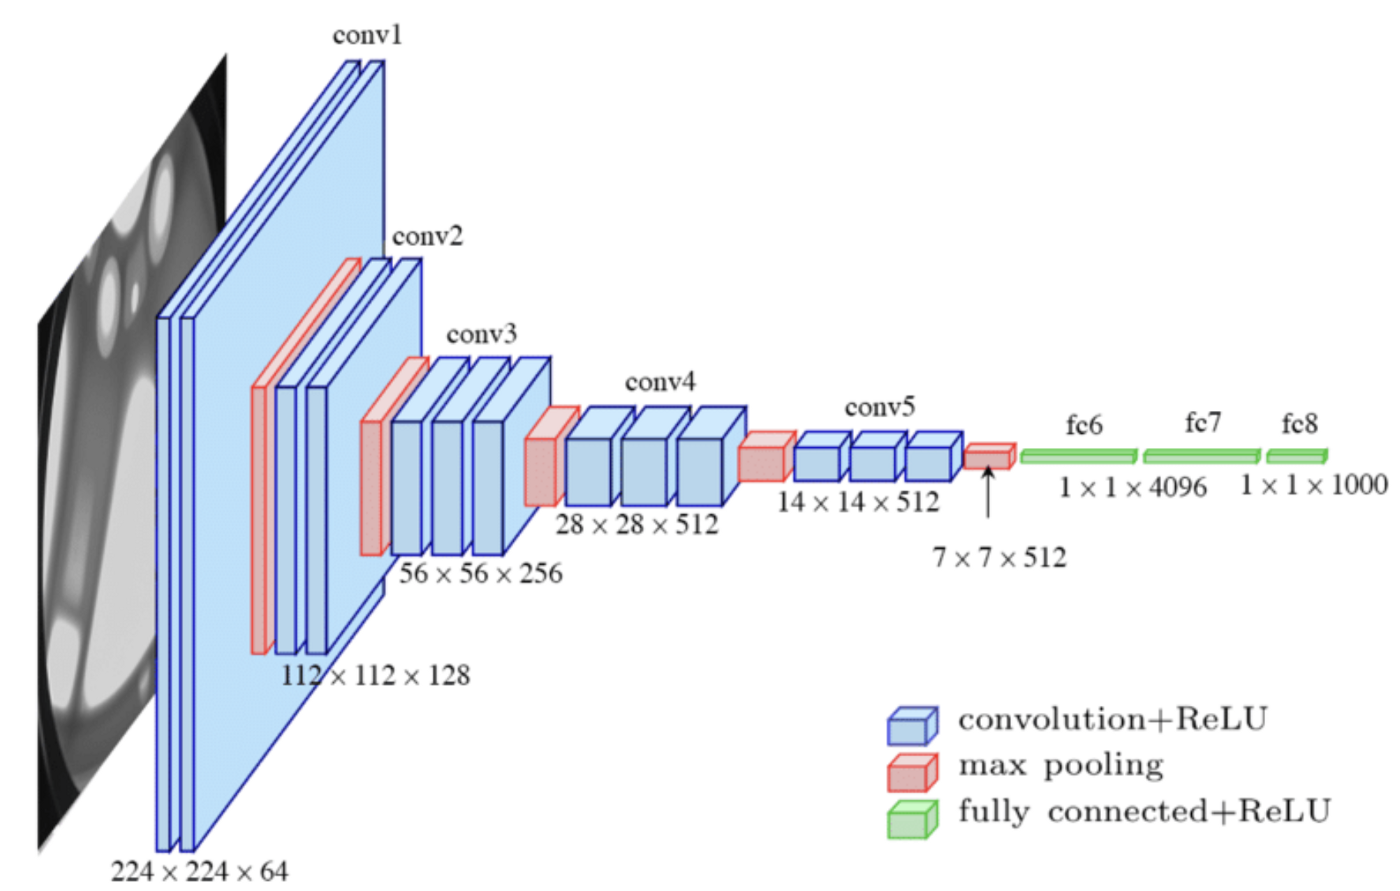

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

**IMPLEMENTING VGG16 USING KERAS**

In [5]:
from keras.applications.vgg16 import VGG16
model = VGG16()

553467096/553467096 [==============================] - 2s 0us/step


In [6]:
from keras.models import Sequential
from keras.layers import Dense
model1 = Sequential()


for layer in model.layers[:-1]: 
    model1.add(layer)    

# Freeze the layers 
for layer in model1.layers:
    layer.trainable = False

# Add 'softmax' instead of earlier 'prediction' layer.
model1.add(Dense(2, activation='softmax'))

**COMPILING THE MODEL**

In [7]:
from keras.optimizers import SGD
import keras
opt = SGD(learning_rate=0.1, momentum=0.9,nesterov=True)
model1.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [8]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [4]:
from keras.utils import image_dataset_from_directory
import tensorflow as tf

tf.config.run_functions_eagerly(True)


**GENERATING TEST-TRAIN-VAL DATA**

In [5]:
# 1st way 
train_dataset_vgg16 = image_dataset_from_directory(r'D:\sem V\DL\Proj\Dataset_Final\train',batch_size=32,image_size=(224, 224),label_mode='categorical')
test_dataset_vgg16 = image_dataset_from_directory(r'D:\sem V\DL\Proj\Dataset_Final\test',batch_size=32,image_size=(224,224),label_mode='categorical')
val_dataset_vgg16 = image_dataset_from_directory(r'D:\sem V\DL\Proj\Dataset_Final\val',batch_size=32,image_size=(224,224),label_mode='categorical')

Found 67917 files belonging to 2 classes.


C:\Users\5510\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Found 8492 files belonging to 2 classes.
Found 8489 files belonging to 2 classes.


In [11]:
# history = model.fit(train_dataset_vgg16,epochs=3)

In [7]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2, validation_split=0.2)


In [8]:
# 2nd way
train_data= train_datagen.flow_from_directory(r'D:\sem V\DL\Proj\Dataset_Final\train',target_size=(224,224),batch_size=8,class_mode='categorical',subset='training')
validation_data= train_datagen.flow_from_directory(r'D:\sem V\DL\Proj\Dataset_Final\val',target_size=(224,224),batch_size=8,class_mode='categorical', subset='validation')


Found 54334 images belonging to 2 classes.
Found 1697 images belonging to 2 classes.


In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint(r'D:\sem V\DL\Proj\model',
                            monitor='val_loss',save_best_only=True,verbose=3)

earlystop = EarlyStopping(monitor = 'val_loss', patience=7, verbose= 3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=3, verbose= 3, )

callbacks=[checkpoint,earlystop,learning_rate]

In [16]:
history = model1.fit(train_data,epochs=10,callbacks=callbacks, validation_data = val_dataset_vgg16)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


6792/6792 [==============================] - ETA: 0s - loss: 27.4799 - accuracy: 0.7200
Epoch 1: val_loss improved from inf to 425.24149, saving model to C:\Users\devan\Desktop\Data\model_2.h5
6792/6792 [==============================] - 1441s 212ms/step - loss: 27.4799 - accuracy: 0.7200 - val_loss: 425.2415 - val_accuracy: 0.5964 - lr: 0.1000
Epoch 2/10
6792/6792 [==============================] - ETA: 0s - loss: 25.3363 - accuracy: 0.7380
Epoch 2: val_loss did not improve from 425.24149
6792/6792 [==============================] - 1433s 211ms/step - loss: 25.3363 - accuracy: 0.7380 - val_loss: 494.1759 - val_accuracy: 0.5767 - lr: 0.1000
Epoch 3/10
6792/6792 [==============================] - ETA: 0s - loss: 24.6502 - accuracy: 0.7424
Epoch 3: val_loss did not improve from 425.24149
6792/6792 [==============================] - 1433s 211ms/step - loss: 24.6502 - accuracy: 0.7424 - val_loss: 610.0859 - val_accuracy: 0.5683 - lr: 0.1000
Epoch 4/10
6792/6792 [===========================

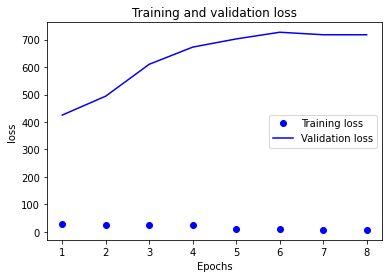

In [17]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


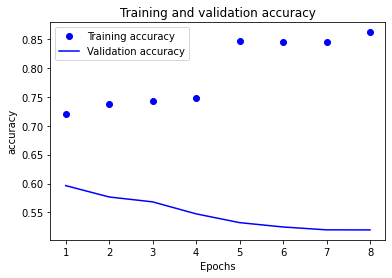

In [19]:
loss_values = history.history['accuracy']
val_loss_values = history.history['val_accuracy']

epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_loss_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
